# Giới thiệu

In [1]:
DATA_ROOT = "../../data/Traffic_flow-HCM"
PREPROCESS_ROOT = "../../data/preprocessed"

# Thư viện sử dụng

In [2]:
import numpy as np
import pandas as pd

import squarify

import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Xem từng file

## streets.csv

Thông tin đoạn đường ở TP. HCM. Có 5553 dòng, 6 cột

### Xem tổng quát

In [3]:
streets_df = pd.read_csv(f"{DATA_ROOT}/streets.csv")
streets_df.shape

(5553, 5)

In [4]:
streets_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           5553 non-null   int64  
 1   level         5553 non-null   int64  
 2   max_velocity  987 non-null    float64
 3   name          3948 non-null   str    
 4   type          5553 non-null   str    
dtypes: float64(1), int64(2), str(2)
memory usage: 331.6 KB


In [5]:
streets_df.head()

,_id,level,max_velocity,name,type
0,31096786,1,80.0,Quốc Lộ 1,trunk
1,32575737,4,NaN,NaN,unclassified
2,32575794,4,NaN,Chu Văn An,unclassified
3,32575820,4,NaN,Nguyễn Văn Bá,tertiary
4,32575823,4,NaN,Nguyễn Thị Nhỏ,tertiary


In [6]:
# Số lượng các giá trị bị thiếu
streets_df.isnull().sum()

_id                0
level              0
max_velocity    4566
name            1605
type               0
dtype: int64

In [7]:
#  Tỉ lệ các giá trị bị thiếu
streets_df.isnull().sum()*100/len(streets_df)

_id              0.000000
level            0.000000
max_velocity    82.225824
name            28.903296
type             0.000000
dtype: float64

In [8]:
streets_df.duplicated().sum()

np.int64(0)

### Xem thuộc tính của streets.csv

#### Id

In [9]:
print(len(streets_df["_id"].unique()))
streets_df["_id"].unique()

5553


array([ 31096786,  32575737,  32575794, ..., 656850719, 656851094,
       658328101], shape=(5553,))

#### Cấp công trình giao thông

In [10]:
level_arr = streets_df["level"]
level_counts = level_arr.value_counts()

In [11]:
level_counts

level
4    2930
3    1268
2     889
1     466
Name: count, dtype: int64

#### Tốc độ tối đa cho phép

In [12]:
velocity_arr = streets_df[streets_df["max_velocity"].notnull()]["max_velocity"]
velocity_arr.min(), \
velocity_arr.max()

(np.float64(10.0), np.float64(120.0))

In [13]:
velocity_counts = velocity_arr.value_counts()
velocity_counts

max_velocity
60.0     422
80.0     180
50.0     150
40.0     145
30.0      25
70.0      18
20.0      15
10.0       9
100.0      9
45.0       7
120.0      7
Name: count, dtype: int64

#### Tên đường

In [14]:
name_arr = streets_df[streets_df["name"].notnull()]["name"]
print(len(name_arr.unique())) # Số lượng tên khác nhau
print(len(name_arr)) # Số con đường được đặt tên
name_arr.unique()

1048
3948


<ArrowStringArray>
[            'Quốc Lộ 1',            'Chu Văn An',         'Nguyễn Văn Bá',
        'Nguyễn Thị Nhỏ',            'Đường số 5',         'Châu Văn Liêm',
          'Lê Văn Thịnh',               'Tân Phú',          'Lê Minh Xuân',
               'Phú Hòa',
 ...
               'Vân Côi',   'Hẻm 117 Hồ Văn Long',        'Nguyễn Thức Tự',
          'Đường số 17B',               'Học Lạc',   'Hẻm 1331 Lê Đức Thọ',
 'Hẻm 14/23 đường số 53',                    'X2',                    'X1',
        'Đình Nghi Xuân']
Length: 1048, dtype: str

#### Loại đường

In [15]:
type_arr = streets_df[streets_df["name"].notnull()]["type"]
print(len(type_arr.unique()))
type_arr.unique()

11


<ArrowStringArray>
[         'trunk',   'unclassified',       'tertiary',      'secondary',
   'primary_link',        'primary',     'trunk_link',  'tertiary_link',
 'secondary_link',       'motorway',  'motorway_link']
Length: 11, dtype: str

In [16]:
type_counts = type_arr.value_counts()
type_counts

type
tertiary          1465
primary            800
secondary          525
unclassified       417
trunk              410
trunk_link         110
primary_link        97
motorway            40
secondary_link      31
motorway_link       27
tertiary_link       26
Name: count, dtype: int64

### Tiền xử lý

In [17]:
preprocess_streets_df = streets_df.copy()

#### Fill NaN velocity = -1

In [18]:
preprocess_streets_df["max_velocity"] = preprocess_streets_df["max_velocity"].fillna(-1)
preprocess_streets_df.head()

,_id,level,max_velocity,name,type
0,31096786,1,80.0,Quốc Lộ 1,trunk
1,32575737,4,-1.0,NaN,unclassified
2,32575794,4,-1.0,Chu Văn An,unclassified
3,32575820,4,-1.0,Nguyễn Văn Bá,tertiary
4,32575823,4,-1.0,Nguyễn Thị Nhỏ,tertiary


#### Fill NaN name = (không tên)

In [19]:
preprocess_streets_df["name"] = preprocess_streets_df["name"].fillna("(không tên)")
preprocess_streets_df.head()

,_id,level,max_velocity,name,type
0,31096786,1,80.0,Quốc Lộ 1,trunk
1,32575737,4,-1.0,(không tên),unclassified
2,32575794,4,-1.0,Chu Văn An,unclassified
3,32575820,4,-1.0,Nguyễn Văn Bá,tertiary
4,32575823,4,-1.0,Nguyễn Thị Nhỏ,tertiary


#### Ordinal encoding level

In [20]:
preprocess_streets_df["level"] = preprocess_streets_df["level"] - 1
preprocess_streets_df.head()

,_id,level,max_velocity,name,type
0,31096786,0,80.0,Quốc Lộ 1,trunk
1,32575737,3,-1.0,(không tên),unclassified
2,32575794,3,-1.0,Chu Văn An,unclassified
3,32575820,3,-1.0,Nguyễn Văn Bá,tertiary
4,32575823,3,-1.0,Nguyễn Thị Nhỏ,tertiary


### Lưu csv

In [21]:
preprocess_streets_df.to_csv(f"{PREPROCESS_ROOT}/streets.csv", index=False)

## nodes.csv

File nodes.csv gồm 577967 dòng, 3 cột gồm: id của node, vĩ dộ, kinh độ tại vị trí đặt sensor

In [22]:
nodes_df = pd.read_csv(f"{DATA_ROOT}/nodes.csv")
nodes_df.shape

(577967, 3)

In [23]:
nodes_df.head()

,_id,long,lat
0,366367223,106.629056,10.804243
1,366367233,106.709701,10.771110
2,366367242,106.737189,10.709337
3,366367274,106.760081,10.854489
4,366367285,106.721163,10.804994


In [24]:
nodes_df.isnull().sum()

_id     0
long    0
lat     0
dtype: int64

In [25]:
nodes_df.duplicated().sum()

np.int64(0)

In [26]:
nodes_df.dtypes

_id       int64
long    float64
lat     float64
dtype: object

In [27]:
long_arr = nodes_df["long"]
lat_arr = nodes_df["lat"]

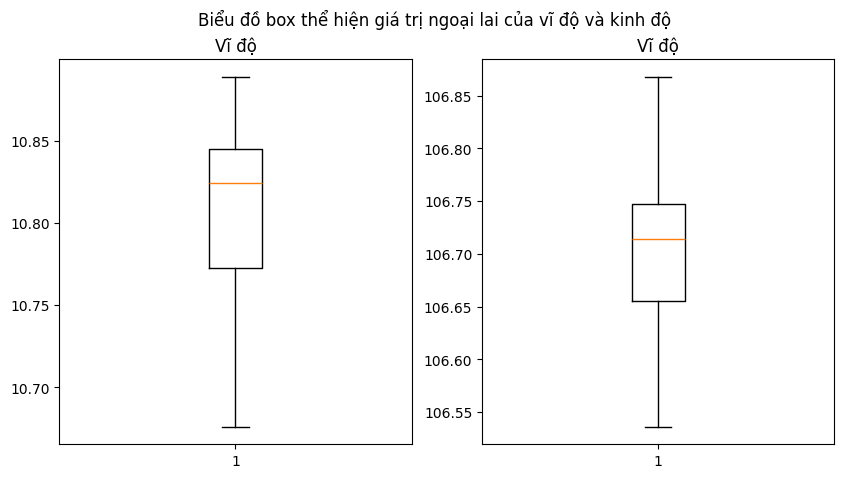

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Biểu đồ box thể hiện giá trị ngoại lai của vĩ độ và kinh độ")

axes[0].set_title("Vĩ độ")
axes[0].boxplot(lat_arr)

axes[1].set_title("Vĩ độ")
axes[1].boxplot(long_arr)
plt.show()

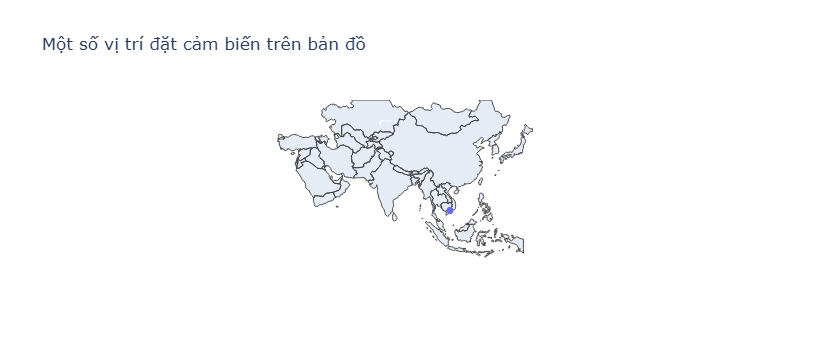

In [29]:
fig = go.Figure(data=go.Scattergeo(
        lon = long_arr[:10],
        lat = lat_arr[:10],
        ))
fig.update_layout(
        title = 'Một số vị trí đặt cảm biến trên bản đồ',
        geo_scope='asia',
    )
fig.show()

In [30]:
nodes_df["long"].min(), \
nodes_df["long"].max()

(np.float64(106.5360046), np.float64(106.8679941))

In [31]:
nodes_df["lat"].min(), \
nodes_df["lat"].max()

(np.float64(10.6760012), np.float64(10.8889982))

In [32]:
# Lưu nodes.csv nguyên vẹn
nodes_df.to_csv(f"{PREPROCESS_ROOT}/nodes.csv", index=False)

## segments.csv

### Xem tổng quát

In [33]:
segments_df = pd.read_csv(f"{DATA_ROOT}/segments.csv")
segments_df.shape

(84633, 11)

In [34]:
segments_df.head()

,_id,created_at,updated_at,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type
0,0,2020-10-18T13:26:17.365Z,2020-10-18T13:26:17.365Z,373543511,5468660805,114,31096786,80.0,1,Quốc Lộ 1,trunk
1,1,2020-10-18T13:26:17.400Z,2020-10-18T13:26:17.400Z,5468660805,5738158916,9,31096786,80.0,1,Quốc Lộ 1,trunk
2,2,2020-10-18T13:26:17.435Z,2020-10-18T13:26:17.435Z,5738158916,5738158918,23,31096786,80.0,1,Quốc Lộ 1,trunk
3,3,2020-10-18T13:26:17.444Z,2020-10-18T13:26:17.444Z,5738158918,5738158912,66,31096786,80.0,1,Quốc Lộ 1,trunk
4,4,2020-10-18T13:26:17.452Z,2020-10-18T13:26:17.452Z,5738158912,5758104203,127,31096786,80.0,1,Quốc Lộ 1,trunk


In [35]:
segments_df.describe()

,_id,s_node_id,e_node_id,length,street_id,max_velocity,street_level
count,84633.000000,8.463300e+04,8.463300e+04,84633.000000,8.463300e+04,9871.000000,84633.000000
mean,42316.000000,3.674041e+09,3.672725e+09,41.818050,2.866904e+08,54.503596,3.500006
std,24431.587003,2.039756e+09,2.040056e+09,52.692336,2.085526e+08,16.553367,0.841222
min,0.000000,3.663672e+08,3.663672e+08,0.000000,3.109679e+07,10.000000,1.000000
25%,21158.000000,2.078951e+09,2.078951e+09,13.000000,3.511357e+07,40.000000,3.000000
50%,42316.000000,4.068031e+09,4.068031e+09,27.000000,2.517313e+08,60.000000,4.000000
75%,63474.000000,5.748273e+09,5.748270e+09,52.000000,4.693276e+08,60.000000,4.000000
max,84632.000000,6.175932e+09,6.175932e+09,1622.000000,6.583281e+08,120.000000,4.000000


In [36]:
segments_df.duplicated().sum()

np.int64(0)

In [37]:
# Số lượng các giá trị bị thiếu trong segments.csv
segments_df.isnull().sum()

_id                 0
created_at          0
updated_at          0
s_node_id           0
e_node_id           0
length              0
street_id           0
max_velocity    74762
street_level        0
street_name       152
street_type         0
dtype: int64

In [38]:
# Tỉ lệ các giá trị bị thiếu trong segments.csv
segments_df.isnull().sum()*100/len(segments_df)

_id              0.000000
created_at       0.000000
updated_at       0.000000
s_node_id        0.000000
e_node_id        0.000000
length           0.000000
street_id        0.000000
max_velocity    88.336701
street_level     0.000000
street_name      0.179599
street_type      0.000000
dtype: float64

### Chuyển kiểu chuỗi về dạng thời gian

In [39]:
segments_df["created_at"] = pd.to_datetime(segments_df["created_at"])
segments_df["updated_at"] = pd.to_datetime(segments_df["updated_at"])
segments_df.dtypes

_id                           int64
created_at      datetime64[us, UTC]
updated_at      datetime64[us, UTC]
s_node_id                     int64
e_node_id                     int64
length                        int64
street_id                     int64
max_velocity                float64
street_level                  int64
street_name                     str
street_type                     str
dtype: object

### Xem từng thuộc tính

#### created_at

In [40]:
segments_df["created_at"].min(), \
segments_df["created_at"].max()

(Timestamp('2020-10-18 13:26:17.365000+0000', tz='UTC'),
 Timestamp('2020-10-18 13:30:29.803000+0000', tz='UTC'))

#### updated_at

In [41]:
segments_df["updated_at"].min(), \
segments_df["updated_at"].max()

(Timestamp('2020-10-18 13:26:17.365000+0000', tz='UTC'),
 Timestamp('2021-04-04 17:00:46.926000+0000', tz='UTC'))

#### length

In [42]:
segments_df["length"].min(), \
segments_df["length"].max()

(np.int64(0), np.int64(1622))

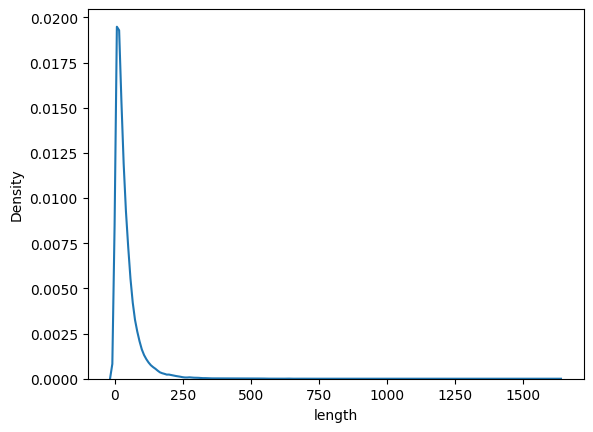

In [43]:
sns.kdeplot(segments_df["length"])
plt.show()

In [44]:
segments_df["length"].describe()

count    84633.000000
mean        41.818050
std         52.692336
min          0.000000
25%         13.000000
50%         27.000000
75%         52.000000
max       1622.000000
Name: length, dtype: float64

#### street_id

In [45]:
len(segments_df["street_id"].unique())

5539

In [46]:
segments_df.head()

,_id,created_at,updated_at,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type
0,0,2020-10-18 13:26:17.365000+00:00,2020-10-18 13:26:17.365000+00:00,373543511,5468660805,114,31096786,80.0,1,Quốc Lộ 1,trunk
1,1,2020-10-18 13:26:17.400000+00:00,2020-10-18 13:26:17.400000+00:00,5468660805,5738158916,9,31096786,80.0,1,Quốc Lộ 1,trunk
2,2,2020-10-18 13:26:17.435000+00:00,2020-10-18 13:26:17.435000+00:00,5738158916,5738158918,23,31096786,80.0,1,Quốc Lộ 1,trunk
3,3,2020-10-18 13:26:17.444000+00:00,2020-10-18 13:26:17.444000+00:00,5738158918,5738158912,66,31096786,80.0,1,Quốc Lộ 1,trunk
4,4,2020-10-18 13:26:17.452000+00:00,2020-10-18 13:26:17.452000+00:00,5738158912,5758104203,127,31096786,80.0,1,Quốc Lộ 1,trunk


#### max_velocity

In [47]:
max_velocity_arr = segments_df["max_velocity"]

In [48]:
max_velocity_arr.min(), \
max_velocity_arr.max()

(np.float64(10.0), np.float64(120.0))

In [49]:
max_velocity_counts = max_velocity_arr.value_counts()
max_velocity_counts

max_velocity
60.0     3314
40.0     1915
80.0     1601
50.0     1595
30.0      710
20.0      259
70.0      222
45.0      133
10.0       69
120.0      37
100.0      16
Name: count, dtype: int64

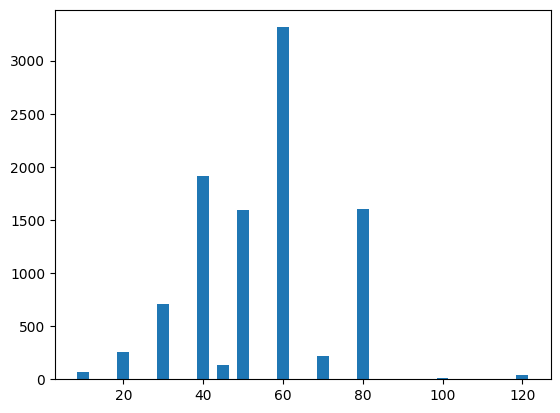

In [50]:
plt.bar(max_velocity_counts.index, max_velocity_counts, 3)
plt.show()

 #### street_level

In [51]:
segments_df["street_level"].value_counts()

street_level
4    58097
3    14342
2     8608
1     3586
Name: count, dtype: int64

#### street_name

In [52]:
print(len(segments_df["street_name"].unique()))
segments_df["street_name"].unique()

1389


<ArrowStringArray>
[                                   'Quốc Lộ 1',
                                   'Thương Mại',
                               'Xã Trung Chánh',
                                   'Chu Văn An',
                                'Nguyễn Văn Bá',
                               'Nguyễn Thị Nhỏ',
                                   'Đường số 5',
                                'Châu Văn Liêm',
                                 'Lê Văn Thịnh',
                                      'Tân Phú',
 ...
                                      'Học Lạc',
                            'Đại lộ ĐHQG TPHCM',
                          'Hẻm 1331 Lê Đức Thọ',
                        'Hẻm 14/23 đường số 53',
                             'Phường Tân Phong',
                                           'X2',
                                           'X1',
                       'Đường Nguyễn Duy Trinh',
 'Đường Song Hành Xa lộ Hà Nội - Nhánh Thủ Đức',
                               'Đình Nghi Xuâ

In [53]:
#### street_type

In [54]:
print(len(segments_df["street_type"].unique()))
segments_df["street_type"].unique()

53


<ArrowStringArray>
[           'trunk',      'marketplace',     'unclassified',
         'tertiary',        'secondary',     'primary_link',
          'primary',      'bus_station',             'bank',
      'residential',             'fuel', 'department_store',
       'trunk_link',       'theme_park',    'tertiary_link',
   'secondary_link',           'bridge',       'apartments',
           'hostel',     'fire_station',      'convenience',
          'shelter',    'training_area',       'pedestrian',
     'dry_cleaning',    'motorway_link',           'chalet',
         'motorway',            'pitch',       'industrial',
        'dormitory',       'university',         'bus_stop',
          'service',              'car',            'house',
          'company',           'school',          'college',
     'construction',       'restaurant',         'hospital',
              'yes',       'government',          'clothes',
          'dentist',              'atm',        'fast_food',
    '

### Tiền xử lý

In [55]:
preprocess_segments_df = segments_df.copy()

#### Kiểm tra thuộc tính tĩnh/động

In [56]:
for col in segments_df.columns:
    if col in ["street_id", "_id"]:
        continue

    uniques_per_segment = segments_df.groupby("street_id")[col].nunique()
    max_unique_values = uniques_per_segment.max()

    print(f"\nKiểm tra cột: '{col}'")
    print(f"  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: {max_unique_values}")


Kiểm tra cột: 'created_at'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 324

Kiểm tra cột: 'updated_at'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 324

Kiểm tra cột: 's_node_id'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 163

Kiểm tra cột: 'e_node_id'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 163

Kiểm tra cột: 'length'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 84

Kiểm tra cột: 'max_velocity'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'street_level'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'street_name'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 6

Kiểm tra cột: 'street_type'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 9


#### Fill street_name NULL = (không tên)

In [57]:
preprocess_segments_df["street_name"] = preprocess_segments_df["street_name"].fillna("(không tên)")
preprocess_segments_df.isnull().sum()

_id                 0
created_at          0
updated_at          0
s_node_id           0
e_node_id           0
length              0
street_id           0
max_velocity    74762
street_level        0
street_name         0
street_type         0
dtype: int64

#### Fill max velocity NULL = -1

#### One-hot encoding cho street type

In [58]:
preprocess_segments_df["max_velocity"] = preprocess_segments_df["max_velocity"].fillna(-1)
preprocess_segments_df.isnull().sum()

_id             0
created_at      0
updated_at      0
s_node_id       0
e_node_id       0
length          0
street_id       0
max_velocity    0
street_level    0
street_name     0
street_type     0
dtype: int64

#### Chuẩn hóa z-score length

In [59]:
length_arr = preprocess_segments_df["length"].values
length_mean = length_arr.mean()
length_std = length_arr.std()
preprocess_segments_df["length_z_score"] = (preprocess_segments_df["length"] - length_mean) / length_std

#### Đổi tên id

In [60]:
preprocess_segments_df = preprocess_segments_df.rename(columns={"_id": "segment_id"})
preprocess_segments_df.head()

,segment_id,created_at,updated_at,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type,length_z_score
0,0,2020-10-18 13:26:17.365000+00:00,2020-10-18 13:26:17.365000+00:00,373543511,5468660805,114,31096786,80.0,1,Quốc Lộ 1,trunk,1.369884
1,1,2020-10-18 13:26:17.400000+00:00,2020-10-18 13:26:17.400000+00:00,5468660805,5738158916,9,31096786,80.0,1,Quốc Lộ 1,trunk,-0.622828
2,2,2020-10-18 13:26:17.435000+00:00,2020-10-18 13:26:17.435000+00:00,5738158916,5738158918,23,31096786,80.0,1,Quốc Lộ 1,trunk,-0.357133
3,3,2020-10-18 13:26:17.444000+00:00,2020-10-18 13:26:17.444000+00:00,5738158918,5738158912,66,31096786,80.0,1,Quốc Lộ 1,trunk,0.458930
4,4,2020-10-18 13:26:17.452000+00:00,2020-10-18 13:26:17.452000+00:00,5738158912,5758104203,127,31096786,80.0,1,Quốc Lộ 1,trunk,1.616600


#### Ordinal encoding street_level

In [61]:
preprocess_segments_df["street_level"] = preprocess_segments_df["street_level"] - 1

### Lưu segments.csv

In [62]:
preprocess_segments_df.to_csv(f"{PREPROCESS_ROOT}/segments.csv", index=False)

## segment_status.csv

### Xem tổng quát

In [63]:
segment_status_df = pd.read_csv(f"{DATA_ROOT}/segment_status.csv")

# Chuyển về kiểu thời gian
segment_status_df["updated_at"] = pd.to_datetime(segment_status_df["updated_at"])
segment_status_df.shape

(90938, 4)

In [64]:
segment_status_df.head()

,_id,updated_at,segment_id,velocity
0,0,2020-07-03 14:55:31.869000+00:00,24845,20
1,1,2020-07-03 15:02:56.048000+00:00,33923,10
2,2,2020-07-04 08:15:52.696000+00:00,33824,5
3,3,2020-07-04 08:15:59.903000+00:00,33824,5
4,4,2020-07-04 08:16:08.201000+00:00,33824,5


In [65]:
segment_status_df.isnull().sum()

_id           0
updated_at    0
segment_id    0
velocity      0
dtype: int64

In [66]:
segment_status_df.duplicated().sum()

np.int64(0)

In [67]:
segment_status_df["updated_at"].min(), \
segment_status_df["updated_at"].max()

(Timestamp('2020-07-03 14:55:31.869000+0000', tz='UTC'),
 Timestamp('2021-04-22 06:53:27.300000+0000', tz='UTC'))

In [68]:
segment_status_df["velocity"].min(), \
segment_status_df["velocity"].max()

(np.int64(0), np.int64(200))

### Xem từng thuộc tính

#### updated_at

In [69]:
segment_status_df["updated_at"].min(), \
segment_status_df["updated_at"].max()

(Timestamp('2020-07-03 14:55:31.869000+0000', tz='UTC'),
 Timestamp('2021-04-22 06:53:27.300000+0000', tz='UTC'))

#### segment_id

In [70]:
print(len(segment_status_df["segment_id"].unique()))
segment_status_df["segment_id"].unique()

10027


array([24845, 33923, 33824, ..., 52243, 52246, 52247], shape=(10027,))

#### velocity

In [71]:
segment_status_df["velocity"].describe()

count    90938.000000
mean        20.754844
std         19.567112
min          0.000000
25%          2.000000
50%         17.000000
75%         34.000000
max        200.000000
Name: velocity, dtype: float64

### Kiểm tra tính tĩnh/động của velocity

In [72]:
velocity_uniques = segment_status_df.groupby("segment_id")["velocity"].nunique()
max_unique_values = velocity_uniques.max()
print(max_unique_values)

42


### Lưu file segment_status.csv không xử lý gì thêm

In [73]:
segment_status_df.to_csv(f"{PREPROCESS_ROOT}/segment_status.csv", index=False)

## train.csv

### Xem tổng quát

In [74]:
train_df = pd.read_csv(f"{DATA_ROOT}/train.csv")
train_df["date"] = pd.to_datetime(train_df["date"])
train_df.shape

(33441, 18)

In [75]:
train_df.head()

,_id,segment_id,date,weekday,period,LOS,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type,long_snode,lat_snode,long_enode,lat_enode
0,0,26,2021-04-16,4,period_0_30,A,366428456,366416066,116,32575820,NaN,4,Nguyễn Văn Bá,tertiary,106.768732,10.841506,106.769254,10.842422
1,1,33,2020-08-02,6,period_23_30,C,366469460,3792257828,26,32575862,NaN,3,Đường số 5,secondary,106.761957,10.878650,106.762143,10.878808
2,2,33,2020-08-03,0,period_0_00,D,366469460,3792257828,26,32575862,NaN,3,Đường số 5,secondary,106.761957,10.878650,106.762143,10.878808
3,3,67,2021-03-09,1,period_9_30,B,366403668,5755066033,7,32575862,NaN,3,Đường số 5,secondary,106.768412,10.880817,106.768461,10.880771
4,4,67,2021-03-23,1,period_9_30,B,366403668,5755066033,7,32575862,NaN,3,Đường số 5,secondary,106.768412,10.880817,106.768461,10.880771


In [76]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 33441 entries, 0 to 33440
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   _id           33441 non-null  int64         
 1   segment_id    33441 non-null  int64         
 2   date          33441 non-null  datetime64[us]
 3   weekday       33441 non-null  int64         
 4   period        33441 non-null  str           
 5   LOS           33441 non-null  str           
 6   s_node_id     33441 non-null  int64         
 7   e_node_id     33441 non-null  int64         
 8   length        33441 non-null  int64         
 9   street_id     33441 non-null  int64         
 10  max_velocity  4946 non-null   float64       
 11  street_level  33441 non-null  int64         
 12  street_name   33440 non-null  str           
 13  street_type   33441 non-null  str           
 14  long_snode    33441 non-null  float64       
 15  lat_snode     33441 non-null  float64       
 1

In [77]:
train_df.describe()

,_id,segment_id,date,weekday,s_node_id,e_node_id,length,street_id,max_velocity,street_level,long_snode,lat_snode,long_enode,lat_enode
count,33441.000000,33441.000000,33441,33441.000000,3.344100e+04,3.344100e+04,33441.000000,3.344100e+04,4946.000000,33441.000000,33441.000000,33441.000000,33441.000000,33441.000000
mean,16720.000000,41014.936575,2020-11-23 07:51:25.852695,2.915254,3.528928e+09,3.582345e+09,48.709010,2.715539e+08,59.299434,3.029993,106.670354,10.804326,106.670334,10.804352
min,0.000000,26.000000,2020-07-03 00:00:00,0.000000,3.663674e+08,3.663678e+08,0.000000,3.257582e+07,10.000000,1.000000,106.537476,10.676452,106.537776,10.676467
25%,8360.000000,21967.000000,2020-11-18 00:00:00,1.000000,2.079964e+09,2.079965e+09,17.000000,5.588046e+07,50.000000,2.000000,106.649521,10.772135,106.649478,10.772131
50%,16720.000000,41654.000000,2020-12-07 00:00:00,3.000000,3.771416e+09,4.066314e+09,34.000000,2.420036e+08,60.000000,3.000000,106.664687,10.797884,106.664704,10.797776
75%,25080.000000,58456.000000,2020-12-26 00:00:00,5.000000,5.738236e+09,5.748445e+09,63.000000,4.082464e+08,60.000000,4.000000,106.685096,10.837117,106.685212,10.837388
max,33440.000000,84535.000000,2021-04-22 00:00:00,6.000000,6.175932e+09,6.175932e+09,1011.000000,6.565625e+08,120.000000,4.000000,106.867740,10.888965,106.867654,10.888993
std,9653.729512,22489.675329,NaN,2.329021,2.008085e+09,2.014716e+09,52.251062,1.908930e+08,14.172472,1.022137,0.041887,0.040358,0.041868,0.040377


In [78]:
train_df.isnull().sum()

_id                 0
segment_id          0
date                0
weekday             0
period              0
LOS                 0
s_node_id           0
e_node_id           0
length              0
street_id           0
max_velocity    28495
street_level        0
street_name         1
street_type         0
long_snode          0
lat_snode           0
long_enode          0
lat_enode           0
dtype: int64

In [79]:
train_df.duplicated().sum()

np.int64(0)

### Kiểm tra từng thuộc tính

#### length

In [80]:
train_df["length"].describe()

count    33441.000000
mean        48.709010
std         52.251062
min          0.000000
25%         17.000000
50%         34.000000
75%         63.000000
max       1011.000000
Name: length, dtype: float64

#### date

In [81]:
train_df["date"].describe()

count                         33441
mean     2020-11-23 07:51:25.852695
min             2020-07-03 00:00:00
25%             2020-11-18 00:00:00
50%             2020-12-07 00:00:00
75%             2020-12-26 00:00:00
max             2021-04-22 00:00:00
Name: date, dtype: object

#### max_velocity

In [82]:
train_df["max_velocity"].describe()

count    4946.000000
mean       59.299434
std        14.172472
min        10.000000
25%        50.000000
50%        60.000000
75%        60.000000
max       120.000000
Name: max_velocity, dtype: float64

#### street_name

In [83]:
train_df["street_name"].describe()

count          33440
unique           695
top       Lê Đức Thọ
freq            1389
Name: street_name, dtype: object

#### street_type

In [84]:
train_df["street_type"].describe()

count        33441
unique          26
top       tertiary
freq         13857
Name: street_type, dtype: object

### Tiền xử lý

In [85]:
preprocess_train_df = train_df.copy()

#### Lọc ra các segment ít record

In [86]:
segment_ids = preprocess_train_df["segment_id"].unique()

min_n = 9999
max_n = -1
lens = []

for s_id in segment_ids:
    segment_df = preprocess_train_df[preprocess_train_df["segment_id"] == s_id]
    n = len(segment_df)
    min_n = min(n, min_n)
    max_n = max(n, max_n)
    lens.append(n)

    mask = preprocess_train_df["segment_id"].map(
        preprocess_train_df["segment_id"].value_counts() >= 20
    )
    
    preprocess_train_df = preprocess_train_df[mask]

print(np.mean(lens))
print(min_n, max_n)

0.5697616435623816
0 54


In [87]:
preprocess_train_df.shape

(5712, 18)

#### Kiểm tra thuộc tính tĩnh/động

In [88]:
for col in train_df.columns:
    if col in ["segment_id", "_id"]:
        continue

    uniques_per_segment = train_df.groupby("segment_id")[col].nunique()
    max_unique_values = uniques_per_segment.max()

    print(f"\nKiểm tra cột: '{col}'")
    print(f"  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: {max_unique_values}")


Kiểm tra cột: 'date'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 28

Kiểm tra cột: 'weekday'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 7

Kiểm tra cột: 'period'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 26

Kiểm tra cột: 'LOS'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 6

Kiểm tra cột: 's_node_id'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'e_node_id'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'length'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'street_id'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'max_velocity'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'street_level'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'street_name'
  Số lượng giá trị duy nhất TỐI ĐA cho bất kỳ segment nào: 1

Kiểm tra cột: 'street_type'
  Số lượng g

#### Xem các giá trị của thuộc tính

In [89]:
# weekday
train_df["weekday"].unique()

array([4, 6, 0, 1, 2, 5, 3])

In [90]:
# Level of service
train_df["LOS"].unique()

<ArrowStringArray>
['A', 'C', 'D', 'B', 'E', 'F']
Length: 6, dtype: str

In [91]:
# Period
train_df["period"].unique()

<ArrowStringArray>
[ 'period_0_30', 'period_23_30',  'period_0_00',  'period_9_30',
  'period_4_30',  'period_7_30', 'period_14_00',  'period_3_00',
  'period_4_00', 'period_14_30',  'period_5_00',  'period_6_30',
  'period_7_00',  'period_5_30',  'period_6_00', 'period_15_00',
  'period_3_30',  'period_8_00', 'period_13_30',  'period_2_30',
 'period_10_30', 'period_11_00',  'period_1_00', 'period_11_30',
 'period_12_00', 'period_12_30',  'period_8_30',  'period_9_00',
 'period_10_00',  'period_1_30', 'period_15_30',  'period_2_00',
 'period_16_00', 'period_23_00', 'period_13_00', 'period_22_30',
 'period_21_30', 'period_22_00', 'period_17_30', 'period_18_00',
 'period_16_30', 'period_17_00', 'period_20_00', 'period_19_30',
 'period_18_30', 'period_19_00']
Length: 46, dtype: str

#### Trích xuất period

In [92]:
period_parts  = preprocess_train_df['period'].str.split('_', expand=True)
preprocess_train_df['hour'] = period_parts [1].astype(int)
preprocess_train_df['minute'] = period_parts [2].astype(int)
preprocess_train_df.head()

,_id,segment_id,date,weekday,period,LOS,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type,long_snode,lat_snode,long_enode,lat_enode,hour,minute
614,614,2443,2020-08-02,6,period_23_30,E,5093747408,5778236991,7,32577460,NaN,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,23,30
615,615,2443,2020-08-03,0,period_0_00,D,5093747408,5778236991,7,32577460,NaN,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,0,0
616,616,2443,2020-11-26,3,period_1_00,E,5093747408,5778236991,7,32577460,NaN,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,1,0
617,617,2443,2020-11-30,0,period_4_30,B,5093747408,5778236991,7,32577460,NaN,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,4,30
618,618,2443,2020-11-30,0,period_5_00,B,5093747408,5778236991,7,32577460,NaN,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,5,0


In [93]:
preprocess_segments_df.head()

,segment_id,created_at,updated_at,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type,length_z_score
0,0,2020-10-18 13:26:17.365000+00:00,2020-10-18 13:26:17.365000+00:00,373543511,5468660805,114,31096786,80.0,0,Quốc Lộ 1,trunk,1.369884
1,1,2020-10-18 13:26:17.400000+00:00,2020-10-18 13:26:17.400000+00:00,5468660805,5738158916,9,31096786,80.0,0,Quốc Lộ 1,trunk,-0.622828
2,2,2020-10-18 13:26:17.435000+00:00,2020-10-18 13:26:17.435000+00:00,5738158916,5738158918,23,31096786,80.0,0,Quốc Lộ 1,trunk,-0.357133
3,3,2020-10-18 13:26:17.444000+00:00,2020-10-18 13:26:17.444000+00:00,5738158918,5738158912,66,31096786,80.0,0,Quốc Lộ 1,trunk,0.458930
4,4,2020-10-18 13:26:17.452000+00:00,2020-10-18 13:26:17.452000+00:00,5738158912,5758104203,127,31096786,80.0,0,Quốc Lộ 1,trunk,1.616600


#### Thêm z-score từ segments

In [94]:
preprocess_train_df = preprocess_train_df.merge(
    preprocess_segments_df[["segment_id", "length_z_score"]],
    on="segment_id",
    how="left"
)
preprocess_train_df.head()

,_id,segment_id,date,weekday,period,LOS,s_node_id,e_node_id,length,street_id,...,street_level,street_name,street_type,long_snode,lat_snode,long_enode,lat_enode,hour,minute,length_z_score
0,614,2443,2020-08-02,6,period_23_30,E,5093747408,5778236991,7,32577460,...,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,23,30,-0.660784
1,615,2443,2020-08-03,0,period_0_00,D,5093747408,5778236991,7,32577460,...,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,0,0,-0.660784
2,616,2443,2020-11-26,3,period_1_00,E,5093747408,5778236991,7,32577460,...,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,1,0,-0.660784
3,617,2443,2020-11-30,0,period_4_30,B,5093747408,5778236991,7,32577460,...,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,4,30,-0.660784
4,618,2443,2020-11-30,0,period_5_00,B,5093747408,5778236991,7,32577460,...,4,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,5,0,-0.660784


#### Ordinal encoding LOS

In [95]:
los_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
preprocess_train_df['LOS_encoded'] = preprocess_train_df['LOS'].map(los_mapping)
preprocess_train_df.head()

,_id,segment_id,date,weekday,period,LOS,s_node_id,e_node_id,length,street_id,...,street_name,street_type,long_snode,lat_snode,long_enode,lat_enode,hour,minute,length_z_score,LOS_encoded
0,614,2443,2020-08-02,6,period_23_30,E,5093747408,5778236991,7,32577460,...,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,23,30,-0.660784,4
1,615,2443,2020-08-03,0,period_0_00,D,5093747408,5778236991,7,32577460,...,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,0,0,-0.660784,3
2,616,2443,2020-11-26,3,period_1_00,E,5093747408,5778236991,7,32577460,...,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,1,0,-0.660784,4
3,617,2443,2020-11-30,0,period_4_30,B,5093747408,5778236991,7,32577460,...,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,4,30,-0.660784,1
4,618,2443,2020-11-30,0,period_5_00,B,5093747408,5778236991,7,32577460,...,Lê Khôi,tertiary,106.628844,10.782197,106.628826,10.782128,5,0,-0.660784,1


#### Ordinal encoding street_level

In [96]:
preprocess_train_df["street_level"] = preprocess_train_df["street_level"] - 1

#### One-hot encoding weekday

In [97]:
preprocess_train_df = pd.get_dummies(preprocess_train_df, columns=["weekday"])
preprocess_train_df.head()

,_id,segment_id,date,period,LOS,s_node_id,e_node_id,length,street_id,max_velocity,...,minute,length_z_score,LOS_encoded,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,614,2443,2020-08-02,period_23_30,E,5093747408,5778236991,7,32577460,NaN,...,30,-0.660784,4,False,False,False,False,False,False,True
1,615,2443,2020-08-03,period_0_00,D,5093747408,5778236991,7,32577460,NaN,...,0,-0.660784,3,True,False,False,False,False,False,False
2,616,2443,2020-11-26,period_1_00,E,5093747408,5778236991,7,32577460,NaN,...,0,-0.660784,4,False,False,False,True,False,False,False
3,617,2443,2020-11-30,period_4_30,B,5093747408,5778236991,7,32577460,NaN,...,30,-0.660784,1,True,False,False,False,False,False,False
4,618,2443,2020-11-30,period_5_00,B,5093747408,5778236991,7,32577460,NaN,...,0,-0.660784,1,True,False,False,False,False,False,False


#### One-hot encoding street_type

In [98]:
preprocess_train_df = pd.get_dummies(preprocess_train_df, columns=["street_type"])
preprocess_train_df.head()

,_id,segment_id,date,period,LOS,s_node_id,e_node_id,length,street_id,max_velocity,...,weekday_4,weekday_5,weekday_6,street_type_primary,street_type_primary_link,street_type_secondary,street_type_tertiary,street_type_trunk,street_type_trunk_link,street_type_unclassified
0,614,2443,2020-08-02,period_23_30,E,5093747408,5778236991,7,32577460,NaN,...,False,False,True,False,False,False,True,False,False,False
1,615,2443,2020-08-03,period_0_00,D,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,False,False,True,False,False,False
2,616,2443,2020-11-26,period_1_00,E,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,False,False,True,False,False,False
3,617,2443,2020-11-30,period_4_30,B,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,False,False,True,False,False,False
4,618,2443,2020-11-30,period_5_00,B,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,False,False,True,False,False,False


### Lưu train.csv

In [99]:
preprocess_train_df.to_csv(f"{PREPROCESS_ROOT}/train.csv", index=False)

# Trực quan giờ cao điểm

In [100]:
preprocess_train_df["time_index"] = preprocess_train_df["hour"] * 60 + preprocess_train_df["minute"]
preprocess_train_df["time_label"] = preprocess_train_df['hour'].astype(str).str.zfill(2) + ':' + preprocess_train_df['minute'].astype(str).str.zfill(2)
preprocess_train_df.head()

,_id,segment_id,date,period,LOS,s_node_id,e_node_id,length,street_id,max_velocity,...,weekday_6,street_type_primary,street_type_primary_link,street_type_secondary,street_type_tertiary,street_type_trunk,street_type_trunk_link,street_type_unclassified,time_index,time_label
0,614,2443,2020-08-02,period_23_30,E,5093747408,5778236991,7,32577460,NaN,...,True,False,False,False,True,False,False,False,1410,23:30
1,615,2443,2020-08-03,period_0_00,D,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,True,False,False,False,0,00:00
2,616,2443,2020-11-26,period_1_00,E,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,True,False,False,False,60,01:00
3,617,2443,2020-11-30,period_4_30,B,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,True,False,False,False,270,04:30
4,618,2443,2020-11-30,period_5_00,B,5093747408,5778236991,7,32577460,NaN,...,False,False,False,False,True,False,False,False,300,05:00


In [101]:
traffic_stats = preprocess_train_df.groupby(['time_index', "time_label"])['LOS_encoded'].mean().reset_index()
traffic_stats.head()

,time_index,time_label,LOS_encoded
0,0,00:00,3.137255
1,30,00:30,3.436782
2,60,01:00,3.596330
3,90,01:30,4.069767
4,120,02:00,2.364865


In [102]:
time_labels = traffic_stats["time_label"]
time_labels.head()

0    00:00
1    00:30
2    01:00
3    01:30
4    02:00
Name: time_label, dtype: str

In [103]:
los_mean = traffic_stats["LOS_encoded"].mean()
peaks = traffic_stats[traffic_stats["LOS_encoded"] > los_mean]
peak_indices = peaks.index
print(peak_indices)

Index([0, 1, 2, 3, 4, 5, 6, 18, 19, 22, 23, 24, 33, 34, 35, 36, 37, 38], dtype='int64')


In [104]:
start_peaks = []
end_peaks = []

segment_start = peak_indices[0]

for i in range(1, len(peak_indices)):
    if peak_indices[i] != peak_indices[i - 1] + 1:
        segment_end = peak_indices[i - 1]

        if segment_end - segment_start + 1 >= 2:
            start_peaks.append(segment_start)
            end_peaks.append(segment_end)

        segment_start = peak_indices[i]

# handle last segment
segment_end = peak_indices[-1]
if segment_end - segment_start + 1 >= 2:
    start_peaks.append(segment_start)
    end_peaks.append(segment_end)

print(start_peaks)
print(end_peaks)

[np.int64(0), np.int64(18), np.int64(22), np.int64(33)]
[np.int64(6), np.int64(19), np.int64(24), np.int64(38)]


In [105]:
start_labels = time_labels[start_peaks].values
end_labels = time_labels[end_peaks].values
start_labels, end_labels

(<ArrowStringArray>
 ['00:00', '09:00', '11:00', '16:30']
 Length: 4, dtype: str,
 <ArrowStringArray>
 ['03:00', '09:30', '12:00', '22:30']
 Length: 4, dtype: str)

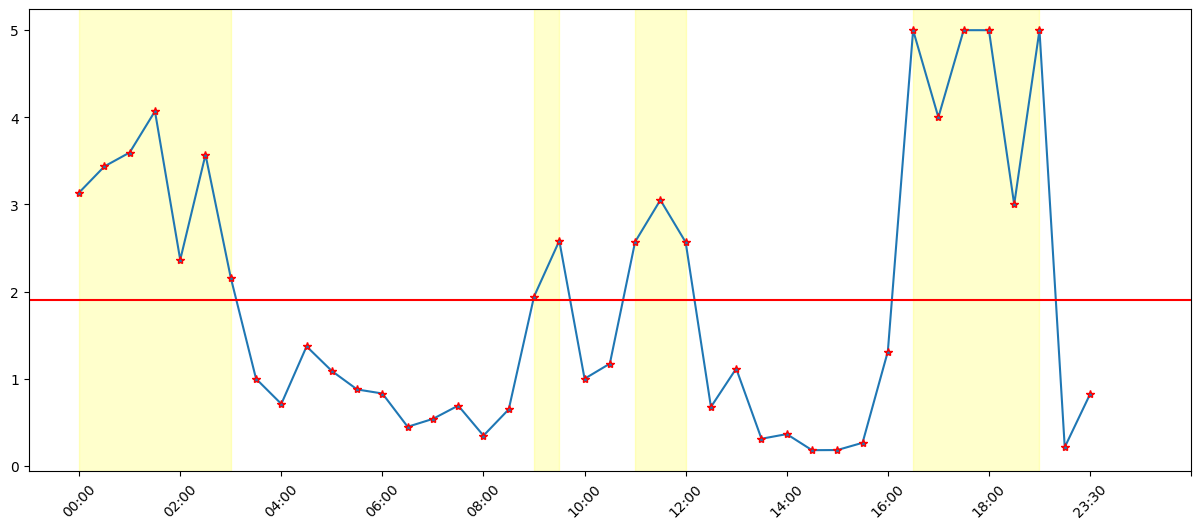

In [106]:
plt.figure(figsize=(15, 6))
plt.plot(traffic_stats["time_label"], traffic_stats["LOS_encoded"], marker="*", mec="r")
plt.axhline(los_mean, c="r")
for idx in range(len(start_labels)):
    plt.axvspan(
        start_labels[idx], 
        end_labels[idx], 
        alpha=0.2, color="yellow")
plt.xticks(np.arange(0, 48, 4), rotation=45)
plt.show()